# Price predictor

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hs= pd.read_csv("data_house.csv")

In [3]:
hs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
hs.shape

(506, 14)

In [5]:
#display all columns data, no: of rows filled in each

hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
#categorical variable

hs['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
hs.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287018,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705353,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
# hs.hist(bins=20,figsize=(20,20))

In [10]:
# t=np.random.permutation(len(hs))

# Test-Train splitting of data

In [11]:
#
def test_train_split(hs,ratio):
    np.random.seed(50)
    shuffle=np.random.permutation(len(hs))
    size=int(len(hs)*ratio)
    train_index=shuffle[:size]
    test_index=shuffle[size:]
    return hs.iloc[train_index],hs.iloc[test_index]

In [12]:
#train,test=test_train_split(hs,.8)

In [13]:
#print(len(train))
#print(len(test))

In [14]:
# from sklearn.model_selection import train_test_split

In [15]:
# test,train=train_test_split(hs,test_size=0.8,random_state=42)

In [16]:
# train.shape

In [17]:
# train.head()

In [18]:
# test.head()

In [19]:
# test['CHAS'].value_counts()

In [20]:
# train['CHAS'].value_counts()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(hs, hs['CHAS']):
    print("TRAIN:\n", train_index, "\nTEST:", test_index)
    train, test = hs.iloc[train_index], hs.iloc[test_index]
    

TRAIN:
 [254 348 476 321 326 411 250 100 429  57 413 115 490 199 494 142 113 468
 400 247 151 408  68 365  81  93 456 116  27 234 140  47 382 377 366 185
  73 267 231 118  96  40 182 417 492 373 294 482  62 414 289  72 314  89
 129 157 110 343 200 310 462 361  95  37 145 227 166  23  85 281 285 264
 501 440 241 473   0 488 452 323 252 416 119  60 251 409 191  42 188 412
  92 353 292 107  12   3 364 339 301 467 376 280 309 202  61  24 122 164
 278 139  10 415 390 338 445 486 156 179 159  22 318 404 425  45  74 147
 431 215 434  44  83 144 500 406 161 331 243 293  86 162 458 359 295 124
 341 244 319 337  15 384 248 441 258  31 481 450 316  66  56 211 184 325
  41  11 262 491 177 369 249 238 125   5 224 235 334 165 475  63 437 497
 226  25  78 178 214 222 410 220  94 344  51 187 132  70 127 402  64 229
 306 298 432 163 117 327 175 442 141 111 120 427 503   8 311 282  75 276
 149 349 454 444 313 131 312   9 112 393 436   6 317  59 453 287  65 154
 308 189  35 392  33 484 447 403 299 499 27

In [22]:
test.shape

(102, 14)

In [23]:
train.shape

(404, 14)

In [24]:
test['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [25]:
train['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [26]:
# 95/7

In [27]:
# 376/28

In [28]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282437,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715663,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [29]:
hs=train.copy()

# Finding Correlation between variables

In [30]:
from pandas.plotting import scatter_matrix

In [31]:
cor=hs.corr()

In [32]:
cor['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680048
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020565C27908>,
      dtype=object)

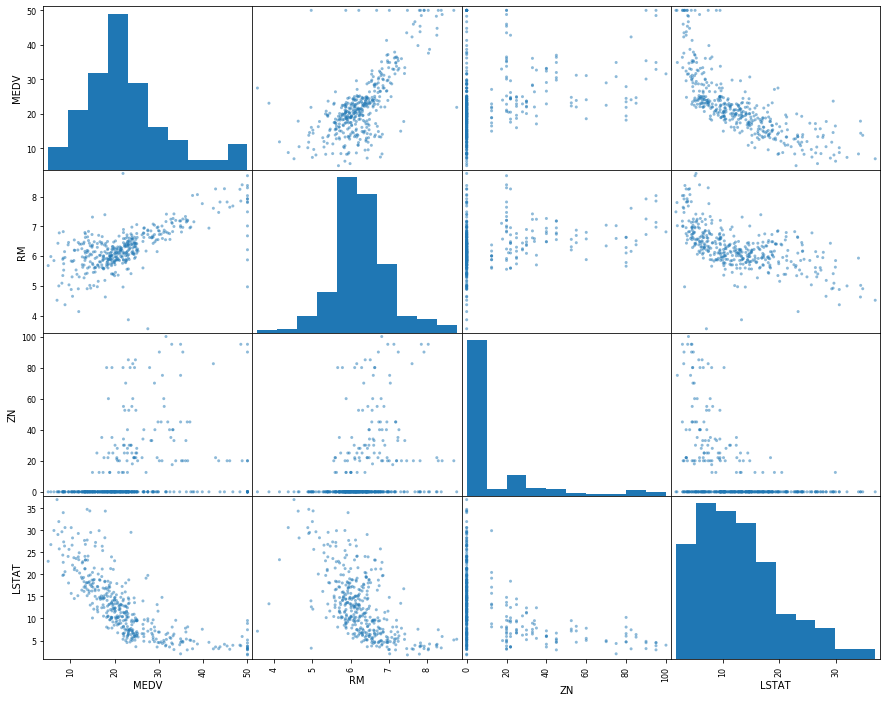

In [33]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(hs[attributes],figsize=(15,12))

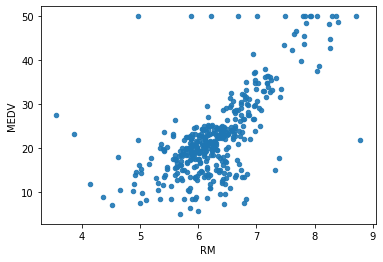

In [34]:
#visualising MEDV and RM variable

hs.plot.scatter('RM','MEDV',alpha=0.9)

# Attribute Combinations

In [35]:
#trying variuos attribute combinations which have better correlation with MEDV for better prediction model

hs['TAXRM']=hs['TAX']/hs['RM']

In [36]:
hs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [37]:
corr=hs.corr()

In [38]:
corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680048
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526321
LSTAT     -0.740494
Name: MEDV, dtype: float64

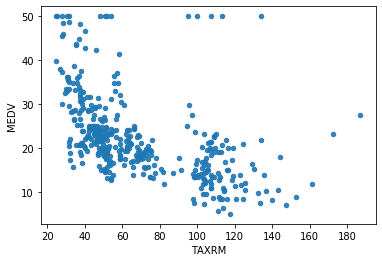

In [39]:
hs.plot.scatter('TAXRM','MEDV',alpha=0.9)

In [40]:
#splitting attributes to x and y in train
#doesnot contain 'TAXRM'

hs=train.drop('MEDV',axis=1)
hs_labels=train['MEDV'].copy()

# Treating missing attributes/values

In [41]:
hs.shape

(404, 13)

In [42]:
# 3 options:
#     1)get rid of missing datapoints
#     2)get rid of the whole attribute
#     3)set the value to some value(0,mean,median)

In [43]:
#option 1

a=hs.dropna(subset=["RM"])

In [44]:
a.shape

(400, 13)

In [45]:
#option 2

b=hs.drop(['RM'],axis=1)

In [46]:
b.shape

(404, 12)

In [47]:
#option 3
median=hs['RM'].median()
median

6.2135

In [81]:
#not changing the original file

hs['RM'].fillna(median)

In [82]:
hs.shape

(404, 13)

In [83]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null int64
NOX        404 non-null float64
RM         400 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null int64
TAX        404 non-null int64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [84]:
#treating missing values in  train set

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(hs)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [85]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [86]:
x=imputer.transform(hs)

In [87]:
x.shape

(404, 13)

In [88]:
x

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [89]:
hs_tr=pd.DataFrame(x,columns=hs.columns)

In [90]:
hs_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15


In [91]:
hs_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(13)
memory usage: 41.1 KB


# scikit Learn design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.e.g Normalizer

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

# Feature Scaling


Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization):
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization:
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


# Creating Pipeline

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer:', SimpleImputer(strategy='median')),
    ('Scaler:',StandardScaler()),
])


In [93]:
hs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [94]:
housing=my_pipeline.fit_transform(hs)

housing.shape

housing_tr=pd.DataFrame(housing,columns=hs.columns)

hs_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
411    17.2
250    24.4
100    27.5
429     9.5
57     31.6
413    16.3
115    18.3
490     8.1
199    34.9
494    24.5
142    13.4
113    18.7
468    19.1
400     5.6
247    20.5
151    19.6
408    17.2
68     17.4
365    27.5
81     23.9
93     25.0
456    12.7
116    21.2
27     14.8
234    29.0
       ... 
433    14.3
430    14.5
479    21.4
438     8.4
38     24.7
18     20.2
97     38.7
266    30.7
133    18.4
449    13.0
477    12.0
171    19.1
180    39.8
158    24.3
279    35.1
109    19.4
82     24.8
386    10.5
418     8.8
126    15.7
446    14.9
101    26.5
277    33.1
405     5.0
367    23.1
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

## Selecting a prediction model for Dragon Real Estates

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing,hs_labels)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [96]:
sample_data=hs.iloc[:5]

sample_labels=hs_labels[:5]

prepared_data=my_pipeline.fit_transform(sample_data)

model.predict(prepared_data)

array([21.28, 31.63,  7.75, 21.81, 20.83])

In [66]:
list(sample_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [67]:
from sklearn.metrics import mean_squared_error
house_pred=model.predict(housing)
mse=mean_squared_error(house_pred,hs_labels)
rmse=np.sqrt(mse)
print(rmse)

1.449558314429155


# Using better evaluation technique-Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing, hs_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
print(rmse_scores)

[3.13263273 2.92952173 4.83683655 2.77344199 3.19927414 2.53741059
 5.48524384 3.66556476 3.96018623 4.27280967]


In [69]:
#Getting scores and comparing performance of each model

def model_perf(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('standard deviation:', scores.std())

In [70]:
model_perf(rmse_scores)

scores: [3.13263273 2.92952173 4.83683655 2.77344199 3.19927414 2.53741059
 5.48524384 3.66556476 3.96018623 4.27280967]
mean: 3.6792922230543668
standard deviation: 0.908217541795642


# Saving Model

In [71]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

# Testing Model

In [72]:
#predicting using the model for test data

x_test=test.drop('MEDV',axis=1)
y_test=test['MEDV'].copy()
test_prepared=my_pipeline.fit_transform(x_test)
predictions=model.predict(test_prepared)
mse_test=mean_squared_error(predictions,y_test)
rmse_test=np.sqrt(mse_test)
print(rmse_test)

3.8112205342625227


In [73]:
print(predictions, list(y_test))

[26.68  7.35 25.56 21.21 17.53 14.94 18.83 15.57 33.03 44.   18.99  7.31
 24.41 31.72 19.74 11.8  32.58 13.69 22.39 18.27 17.86 16.05 18.95 21.63
 19.07 29.98 18.21 32.22  8.26 34.16 21.63 20.96 22.53  7.59 19.15 11.93
 39.99 23.27 24.74 44.03 22.19 29.93 19.57 21.01 15.02 31.73 43.33 19.63
 16.77 22.55 21.58 14.5  19.83 14.02 25.89 31.22 38.34 27.78 17.43 20.17
 46.75  9.31 17.85 22.25 14.83 37.48 19.41 17.77 17.16 33.14 26.56 22.02
 18.47 22.13 35.6  15.06 15.28 19.84 20.85 20.1  22.95 22.83 11.83 22.23
 19.57 22.45 14.19 21.77 23.58 23.56 16.59 26.71  8.08 26.33 13.68 31.73
 20.36 29.78 15.06 26.48 19.65 18.69] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 3

In [74]:
si=(predictions.mean()/y_test.mean())

In [75]:
si

0.9794002946529158

## Using the model

In [76]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[1.5010e-02, 8.0000e+01, 2.0100e+00, 0.0000e+00, 4.3500e-01,
       6.6350e+00, 2.9700e+01, 8.3440e+00, 4.0000e+00, 2.8000e+02,
       1.7000e+01, 3.9094e+02, 5.9900e+00]])
model.predict(features)

array([25.73])

In [77]:
np.array(hs.iloc[1])

array([1.5010e-02, 8.0000e+01, 2.0100e+00, 0.0000e+00, 4.3500e-01,
       6.6350e+00, 2.9700e+01, 8.3440e+00, 4.0000e+00, 2.8000e+02,
       1.7000e+01, 3.9094e+02, 5.9900e+00])

In [78]:
train.iloc[1]

CRIM         0.01501
ZN          80.00000
INDUS        2.01000
CHAS         0.00000
NOX          0.43500
RM           6.63500
AGE         29.70000
DIS          8.34400
RAD          4.00000
TAX        280.00000
PTRATIO     17.00000
B          390.94000
LSTAT        5.99000
MEDV        24.50000
Name: 348, dtype: float64